In [13]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import tikzplotlib
import pandas as pd

In [2]:
from lib.utils import barplot, plot

In [3]:
TRACES = ['FB 2009-0', 'FB 2009-1', 'FB 2010', 'LANL Mustang', 'Alibaba']
ALGORITHMS = ['Memoryless', 'LCP', 'Int-LCP', 'Probabilistic', 'RBG', 'Randomized Probabilistic', 'Randomized RBG']

In [56]:
def cr(rel_regrets):
  return np.mean(np.array(rel_regrets)[~np.isnan(rel_regrets)]) * (-100)

In [31]:
def mdv(costs, trace):
  filtered_costs = np.array(costs)[~np.isnan(costs)]
  return (costs[trace] - np.mean(filtered_costs)) / np.std(filtered_costs) if not np.isnan(costs[trace]) else 0

In [32]:
def dev(costs_per_trace, trace):
  return np.mean([mdv(alg, trace) for alg in costs_per_trace])

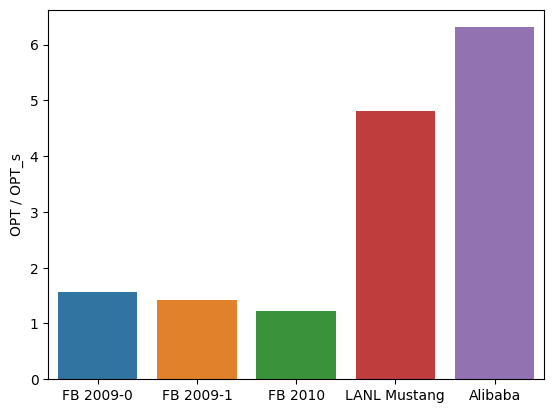

In [38]:
barplot(TRACES, [1.571471378, 1.414242315, 1.221588301, 4.805223659, 6.309038356], '', 'OPT / OPT_s', 'opt_vs_opts')
plt.show()

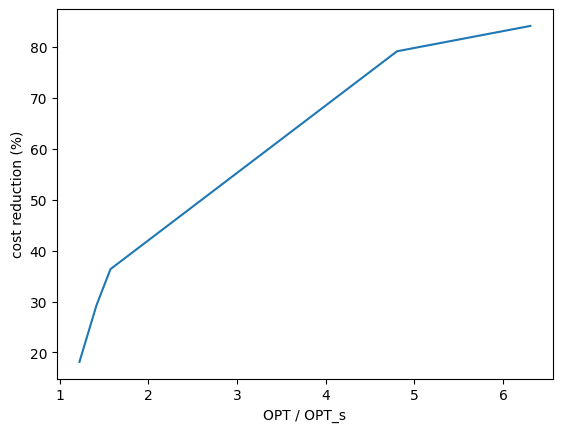

In [39]:
plot([1.571471378, 1.414242315, 1.221588301, 4.805223659, 6.309038356], [
  cr([-0.363619177, -0.363612174, -0.363645094, -0.363619177, -0.363625619]),
  cr([-0.29288734, -0.29288734, -0.292901957, -0.29288734, -0.292904533, -0.292888825, -0.292888825]),
  cr([-0.181391524, -0.181391229, -0.181393079]),
  cr([-0.791351784, -0.791742714, -0.791760251]),
  cr([-0.841325124, -0.841397867, -0.841397882])
], 'OPT / OPT_s', 'cost reduction (%)', 'opt_vs_opts_against_mean_cost_reduction')
plt.show()

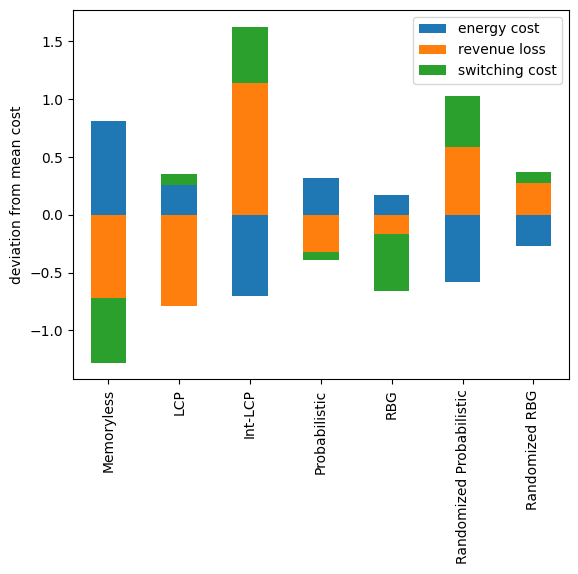

In [37]:
index = ['energy cost', 'revenue loss', 'switching cost']
energy_costs_per_alg_per_trace = [[14004000, 14007600, 13960800, 14004000, np.NaN, 13942800, np.NaN], [15764400,	15764400,	15735600,	15764400,	15764400,	15721200,	15721200], [57463200,	57466800,	57423600, np.NaN, np.NaN, np.NaN, np.NaN], [8006400,	7988400,	7959600, np.NaN, np.NaN, np.NaN, np.NaN], [38804400,	3878280, 38775600, np.NaN, np.NaN, np.NaN, np.NaN]]
revenue_loss_per_alg_per_trace = [[2791392.603,	2787977.468,	2833904.437,	2791392.603, np.NaN, 2852414.566, np.NaN], [3150594.623,	3150594.623,	3178999.545,	3150594.623,	3150594.623,	3193738.906,	3193738.906], [12344545.49,	12340974.64,	12384008.84, np.NaN, np.NaN, np.NaN, np.NaN], [1586881.507,	1586881.507,	1614886.75, np.NaN, np.NaN, np.NaN, np.NaN], [8266156.221,	8266161.927,	8273357.72, np.NaN, np.NaN, np.NaN, np.NaN]]
switching_costs_per_alg_per_trace = [[4024,	4024,	4028,	4024, np.NaN, 4032, np.NaN], [3804,	3804,	3808,	3804,	3344,	3820,	3820], [13104,	13100,	13108, np.NaN, np.NaN, np.NaN, np.NaN], [5196,	5212,	5200, np.NaN, np.NaN, np.NaN, np.NaN], [15888,	15896,	15896, np.NaN, np.NaN, np.NaN, np.NaN]]
df = pd.concat([pd.DataFrame({ALGORITHMS[0]:[dev(energy_costs_per_alg_per_trace, 0), dev(revenue_loss_per_alg_per_trace, 0), dev(switching_costs_per_alg_per_trace, 0)]}, index=index),
                pd.DataFrame({ALGORITHMS[1]:[dev(energy_costs_per_alg_per_trace, 1), dev(revenue_loss_per_alg_per_trace, 1), dev(switching_costs_per_alg_per_trace, 1)]}, index=index),
                pd.DataFrame({ALGORITHMS[2]:[dev(energy_costs_per_alg_per_trace, 2), dev(revenue_loss_per_alg_per_trace, 2), dev(switching_costs_per_alg_per_trace, 2)]}, index=index),
                pd.DataFrame({ALGORITHMS[3]:[dev(energy_costs_per_alg_per_trace, 3), dev(revenue_loss_per_alg_per_trace, 3), dev(switching_costs_per_alg_per_trace, 3)]}, index=index),
                pd.DataFrame({ALGORITHMS[4]:[dev(energy_costs_per_alg_per_trace, 4), dev(revenue_loss_per_alg_per_trace, 4), dev(switching_costs_per_alg_per_trace, 4)]}, index=index),
                pd.DataFrame({ALGORITHMS[5]:[dev(energy_costs_per_alg_per_trace, 5), dev(revenue_loss_per_alg_per_trace, 5), dev(switching_costs_per_alg_per_trace, 5)]}, index=index),
                pd.DataFrame({ALGORITHMS[6]:[dev(energy_costs_per_alg_per_trace, 6), dev(revenue_loss_per_alg_per_trace, 6), dev(switching_costs_per_alg_per_trace, 6)]}, index=index)],
               axis=1, sort=False)

df.T.plot.bar(stacked=True)
plt.ylabel('deviation from mean cost')
tikzplotlib.save(f"out/figures/costs.tex")
plt.show()

In [44]:
np.mean([1.000458774, 1.001961521, 1.000001934, 1.000020672, 1.000040727])
np.mean([1.000051732, 1.000020672, 1.000002294, 1.000084215, 1.000000124])
np.mean([1.000000035, 1, 1.000000034, 1, 1])
np.mean([1.000040727, 1.000020672])
np.mean([1.000018572, 1.000030605])

1.0000306995

In [66]:
crs = [
  [-0.363619177, -0.363612174, -0.363645094, -0.363619177, np.NaN, -0.363625619, np.NaN],
  [-0.29288734, -0.29288734, -0.292901957, -0.29288734, -0.292904533, -0.292888825, -0.292888825],
  [-0.181391524, -0.181391229, -0.181393079, np.NaN, np.NaN, np.NaN, np.NaN],
  [-0.791351784, -0.791742714, -0.791760251, np.NaN, np.NaN, np.NaN, np.NaN],
  [-0.841325124, -0.841397867, -0.841397882, np.NaN, np.NaN, np.NaN, np.NaN]]
def normalizing_factor(cr_):
  filtered_cr = np.array(cr_)[~np.isnan(cr_)]
  if filtered_cr.shape[0] == 0:
    return 100
  elif filtered_cr.shape[0] == 1:
    return filtered_cr[0] * (100)
  else:
    return np.std(filtered_cr) * (100)
def cr_dev(rel_regrets):
  return [(cr(rel_regrets[i]) - cr(cr_)) / normalizing_factor(cr_) for i, cr_ in enumerate(crs)]
crs_t = np.transpose(crs)
print(crs_t)
[np.mean(np.array(cr_dev(rel_regrets))[~np.isnan(cr_dev(rel_regrets))]) for rel_regrets in crs_t]

[[-0.36361918 -0.29288734 -0.18139152 -0.79135178 -0.84132512]
 [-0.36361217 -0.29288734 -0.18139123 -0.79174271 -0.84139787]
 [-0.36364509 -0.29290196 -0.18139308 -0.79176025 -0.84139788]
 [-0.36361918 -0.29288734         nan         nan         nan]
 [        nan -0.29290453         nan         nan         nan]
 [-0.36362562 -0.29288883         nan         nan         nan]
 [        nan -0.29288883         nan         nan         nan]]


[-0.9014863484211212,
 -0.25972458990702296,
 1.2186776587090107,
 -0.5812487758387805,
 1.7518217041115707,
 -0.18872227997137542,
 -0.4992131943511052]